# Libary and Data Loading

In [ ]:
cd /content/drive/MyDrive/MSDS-20/After Mid content/TT/TT project/Data/Detect Bussiness Churn

/content/drive/MyDrive/MSDS-20/After Mid content/TT/TT project/Data/Detect Bussiness Churn


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
df = pd.read_excel('churn_to_AverageSales.xlsx',engine='openpyxl',na_values = '(NULL)')
to_drop=['Unnamed: 0','bussinesID', 'created_on', 'last_login','country']
df.drop(to_drop, inplace=True, axis=1)

In [ ]:
# scale and encode columns
ss = StandardScaler()
le = LabelEncoder()
# Transform all categorical columns in Dependant Varaible X
for i in df.columns:
    if df[i].dtype not in ['int64','float64'] :
        df[[i]]=le.fit_transform(df[[i]])
    elif i not in ['current_bussiness_status']:
        df[[i]]=ss.fit_transform(df[[i]])
        

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X = df.loc[:, df.columns != 'current_bussiness_status'].values
y = df['current_bussiness_status'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10556, 27), (2640, 27), (10556,), (2640,))

In [ ]:
def plot_roc_curve_many(fpr,tpr,models):
  print("Collective ROC Curve")
  plt.figure(figsize=(20,10))
  plt.plot([0,1],[0,1], color='blue',linestyle='--')
  for idx in range(0,len(models)):
    plt.plot(fpr[idx],tpr[idx],label='ROC '+models[idx])  
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend()
  plt.show()


names = ["RFC"]
classifiers = [AdaBoostClassifier()]


# names_1 = ["Logistic Regression", "Linear SVM", "RBF SVM",
#          "Decision Tree", "Random Forest"]
# classifiers_1 = [
#     LogisticRegression(solver='lbfgs',class_weight="balanced"),
#     SVC(kernel="linear", C=0.025,probability=True,class_weight="balanced"),
#     SVC(gamma=2, C=1,probability=True,class_weight="balanced"),
#     DecisionTreeClassifier(max_depth=5,random_state=0,class_weight="balanced"),
#     RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0,class_weight="balanced")]  



def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr, color='red',label='ROC')
  plt.plot([0,1],[0,1], color='blue',linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend()
  plt.show()

def evaluateModel(model):
  y_pred = model.predict(X_test)
  probs = model.predict_proba(X_test)
  probs = probs [:,1]
  fpr, tpr, thr = roc_curve(y_test,probs)
  print("\nClassification Score",model.score(X_test, y_test))
  print("\nROC Score :",roc_auc_score(y_test,probs))
  print("\nClassification Report\n")
  print(classification_report(y_test, y_pred))
  print("\nConfusion Matrix\n")
  print(confusion_matrix(y_test, y_pred))
  print("\nROC Curve\n")
  plot_roc_curve(fpr,tpr)
  print("\nPR Curve\n")
  plot_precision_recall_curve(model,X_test,y_test)


Testing Classifier  AdaBoost

Classification Score 0.9670454545454545

ROC Score : 0.9856502521847017

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2392
           1       0.83      0.82      0.82       248

    accuracy                           0.97      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.97      0.97      0.97      2640


Confusion Matrix

[[2349   43]
 [  44  204]]

ROC Curve



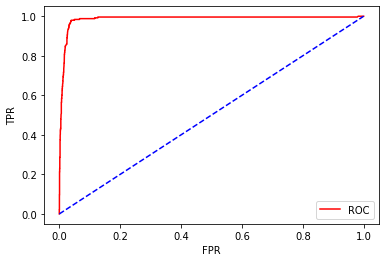


PR Curve



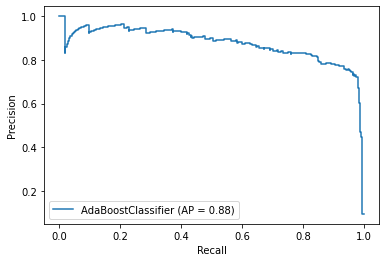

In [ ]:
fprs,tprs=[],[]
for name,clf in zip(names,classifiers):
    print("\nTesting Classifier ",name)
    clf.fit(X_train, y_train)
    probs = clf.predict_proba(X_test)
    probs = probs [:,1]
    fpr, tpr, thr = roc_curve(y_test,probs)
    fprs.append(fpr)
    tprs.append(tpr)
    evaluateModel(clf)

Collective ROC Curve


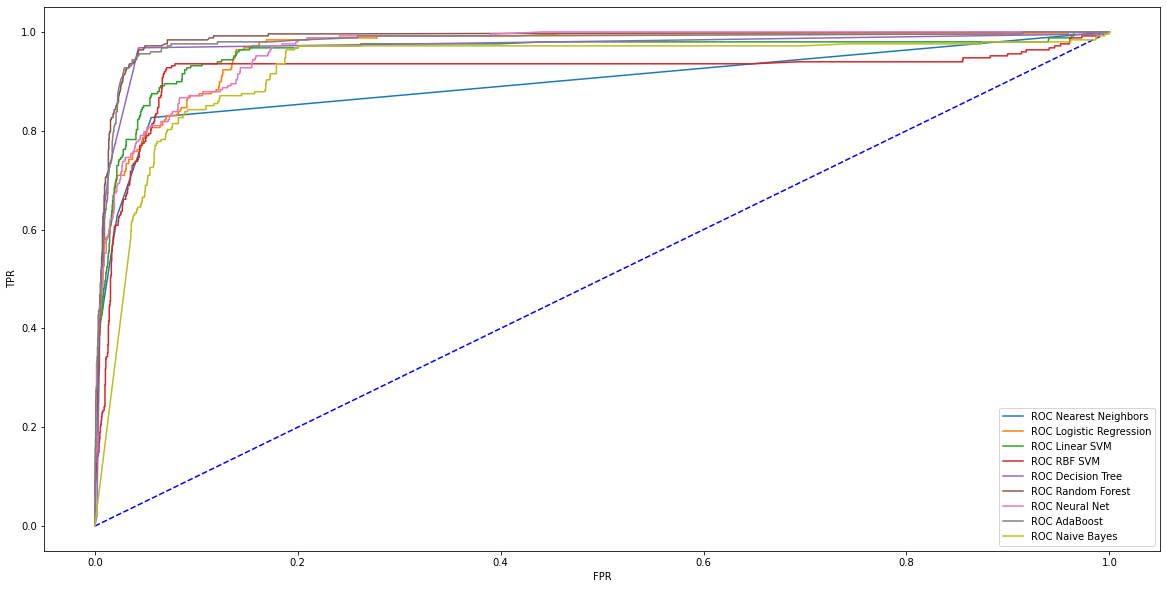

In [ ]:
plot_roc_curve_many(fprs,tprs,names)

# Hyperparameter tuning of random forest

In [ ]:
rf = classifiers[5]
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


## RandomSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring='f1')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=5,
                                                    n_estimators=10,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},


In [ ]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [ ]:
# Make Random Forest with best found hyperparameters
rf_best = RandomForestClassifier(random_state=0, n_estimators =  2000, 
                                min_samples_split= 10, min_samples_leaf= 1, 
                                max_features= 'sqrt', max_depth= 10, 
                                bootstrap = False)


Classification Score 0.9674242424242424

ROC Score : 0.9880060551300033

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2392
           1       0.82      0.83      0.83       248

    accuracy                           0.97      2640
   macro avg       0.90      0.91      0.91      2640
weighted avg       0.97      0.97      0.97      2640


Confusion Matrix

[[2347   45]
 [  41  207]]

ROC Curve



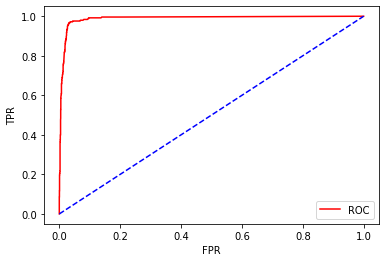


PR Curve



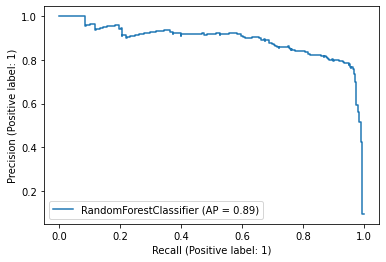

In [ ]:
#Train and evaluate The original rf 
rf.fit(X_train,y_train)
evaluateModel(rf)


Classification Score 0.9674242424242424

ROC Score : 0.9875416374474054

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2392
           1       0.83      0.83      0.83       248

    accuracy                           0.97      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.97      0.97      0.97      2640


Confusion Matrix

[[2349   43]
 [  43  205]]

ROC Curve



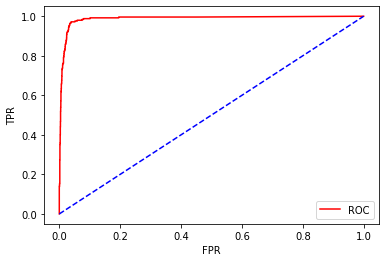


PR Curve



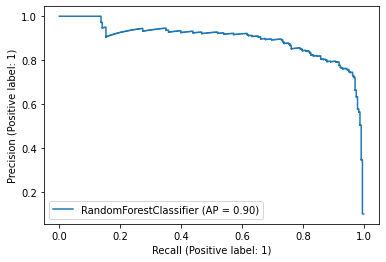

In [ ]:
# train and evalute the best fit rf
rf_best.fit(X_train,y_train)
evaluateModel(rf_best)

# GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False,True],
    'max_depth': [10, 20, 30],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [ 10, 12,14],
    'n_estimators': [2000, 2100, 2200]
}
# Create a based model
rf = classifiers[5]
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 5,scoring='f1')

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=10,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'max_depth': [10, 20, 30],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [10, 12, 14],
                         'n_estimators': [2000, 2100, 2200]},
             scoring='f1', verbose=5)

In [ ]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 2000}

In [ ]:
rf_best.feature_importances_

array([5.49939058e-02, 2.91758940e-02, 6.45287821e-03, 1.17671810e-01,
       1.30728118e-01, 2.45634715e-01, 5.82579502e-03, 6.87450672e-02,
       1.43458532e-03, 2.01278205e-03, 1.18516559e-03, 1.36888245e-03,
       7.22467381e-04, 2.36040590e-03, 1.62036433e-02, 5.52654058e-03,
       6.62563375e-03, 1.54848237e-03, 7.56839859e-04, 2.63084114e-04,
       1.25552043e-03, 7.00035740e-04, 1.55650514e-03, 1.26202104e-02,
       3.10509975e-04, 3.45089824e-03, 2.80869624e-01])

# Hyperparameter Tuning for KNN using gridSearchCV

In [ ]:
knn = classifiers[0]

KNeighborsClassifier(n_neighbors=3)

In [ ]:
params = {
        'n_neighbors' : [int(x) for x in range(2,8)],
        'weights': ['uniform','distance'],
        'algorithm': ['auto','ball_tree','kd_tree','brute'],
               
}
grid_knn = GridSearchCV(estimator=knn,
                       param_grid=params,
                        scoring='f1',cv=5,n_jobs=-1,verbose=1)


In [ ]:
pprint(params)

{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'n_neighbors': [2, 3, 4, 5, 6, 7],
 'weights': ['uniform', 'distance']}


In [ ]:
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [ ]:
grid_knn.best_score_

0.7065377068577087

In [ ]:
grid_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}


Classification Score 0.9534090909090909

ROC Score : 0.928776364764268

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2392
           1       0.82      0.65      0.72       248

    accuracy                           0.95      2640
   macro avg       0.89      0.82      0.85      2640
weighted avg       0.95      0.95      0.95      2640


Confusion Matrix

[[2357   35]
 [  88  160]]

ROC Curve



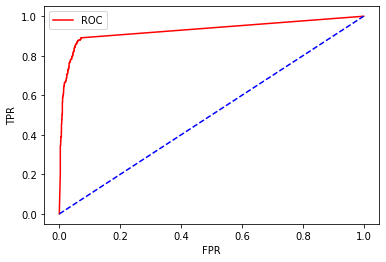


PR Curve



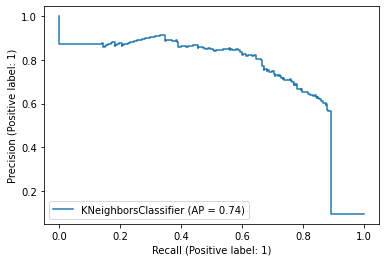

In [ ]:
best_knn = grid_knn.best_estimator_
evaluateModel(best_knn)

# Best performing Algorithm


Classification Score 0.9666666666666667

ROC Score : 0.9853855931060527

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2392
           1       0.82      0.83      0.82       248

    accuracy                           0.97      2640
   macro avg       0.90      0.91      0.90      2640
weighted avg       0.97      0.97      0.97      2640


Confusion Matrix

[[2346   46]
 [  42  206]]

ROC Curve



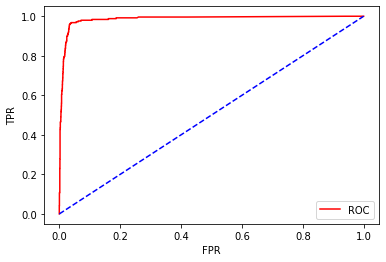


PR Curve



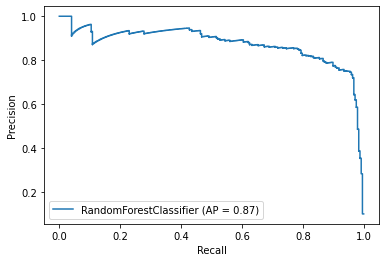

In [ ]:
# Make Random Forest with best found hyperparameters
best_algo_rf = RandomForestClassifier(random_state=0, n_estimators =  2000, 
                                min_samples_split= 10, min_samples_leaf= 1, 
                                max_features= 'sqrt', max_depth= 10, 
                                bootstrap = False)
best_algo_rf.fit(X_train,y_train)
evaluateModel(best_algo_rf)

In [ ]:
importances = pd.DataFrame({'feature':X_df.columns,'importance':np.round(best_algo_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances.head(10)

,importance
feature,
total_revenue,0.266
average sales,0.259
no_of_customers,0.138
no_of_repair_jobs,0.120
no_of_purchases,0.062
billing_cycle,0.056
tenure,0.028
use_MobileSentrix,0.016
use_RepairDeskPay,0.012


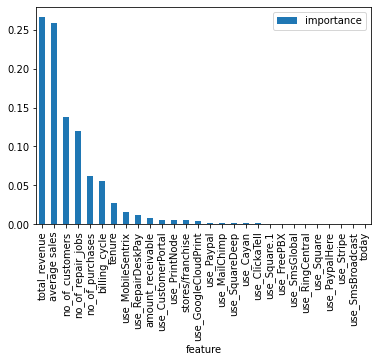

In [ ]:
imp = importances.plot.bar()

In [ ]:
imp.figure.savefig('featureimportance.png')